In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv(r"hyundi.csv")

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [4]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object

In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

In [6]:
df.shape

(4860, 9)

In [7]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),'\n',sep = '\n')

model
[' Accent' ' Amica' ' Getz' ' I10' ' I20' ' I30' ' I40' ' I800' ' IX20'
 ' IX35' ' Ioniq' ' Kona' ' Santa Fe' ' Terracan' ' Tucson' ' Veloster']


year
[2000 2002 2003 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


price
[ 1200  1295  1395 ... 40365 43995 92000]


transmission
['Automatic' 'Manual' 'Other' 'Semi-Auto']


mileage
[     1      2      4 ... 125968 130000 138000]


fuelType
['Diesel' 'Hybrid' 'Other' 'Petrol']


tax(£)
[  0  20  30 115 120 125 135 140 145 150 160 165 190 200 205 235 240 260
 265 300 305 325 330 555]


mpg
[  1.1  28.   28.8  30.4  31.7  32.8  33.6  34.   34.5  34.9  35.3  35.8
  36.2  37.2  37.7  38.2  38.7  39.2  39.8  40.4  40.9  41.5  42.2  42.8
  43.5  43.6  44.1  44.8  45.6  46.   46.3  47.1  47.9  48.7  49.6  50.4
  51.4  52.3  53.3  54.3  55.4  56.5  57.6  57.7  58.9  60.1  61.4  61.7
  62.8  64.2  65.7  67.3  68.9  70.6  72.4  74.3  76.3  78.4  78.5 256.8]


engineSize
[0.  1.  1.1 1.2 1.3 1.4 1.6 1.7 2.  

In [8]:
#Check column types and describe which columns are numerical or categorical
numerical_cols = []
categorical_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

In [9]:
print('Numerical columns:', numerical_cols)
print('Categorical columns:', categorical_cols)

Numerical columns: ['year', 'price', 'mileage', 'tax(£)', 'mpg', 'engineSize']
Categorical columns: ['model', 'transmission', 'fuelType']


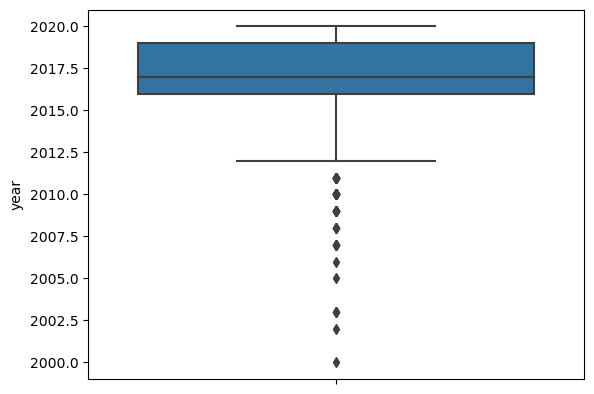

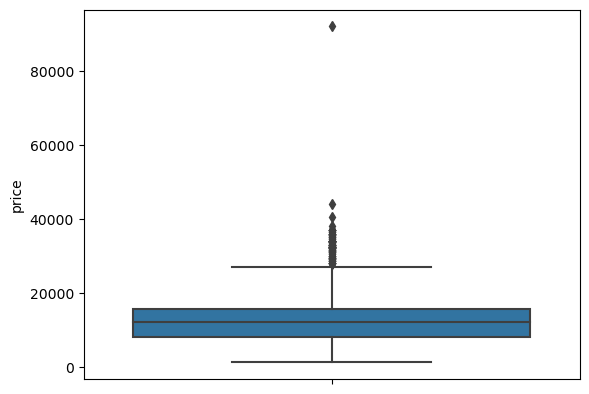

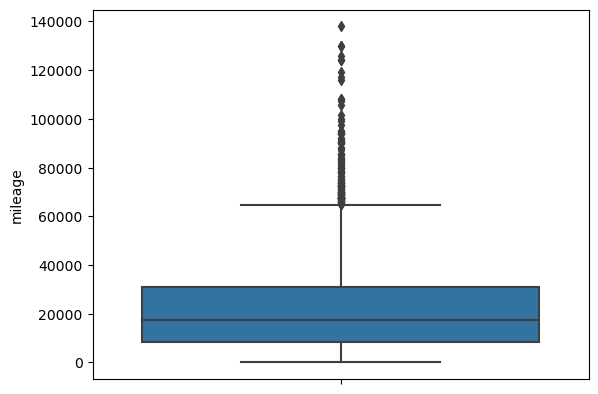

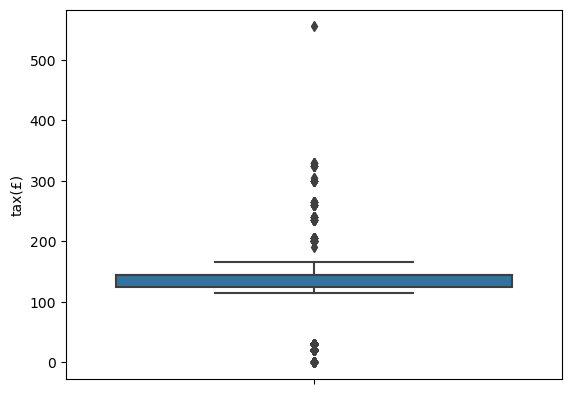

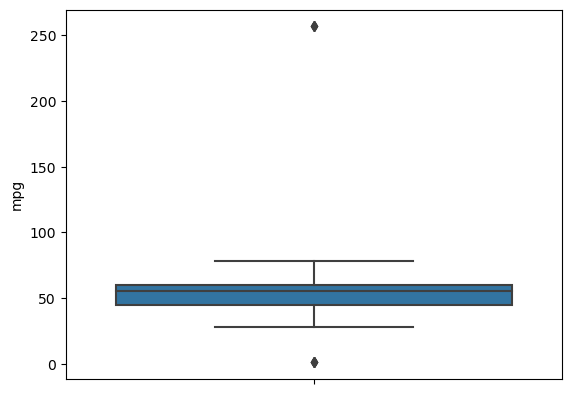

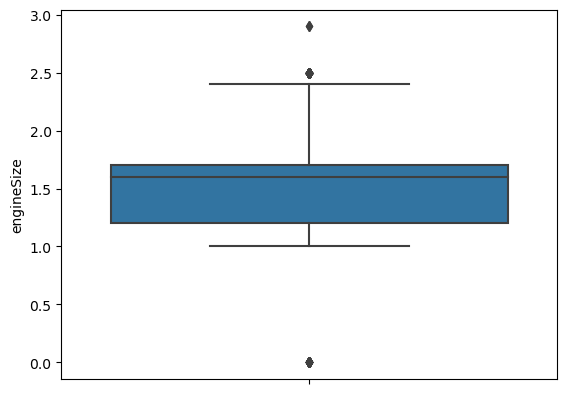

In [10]:
for i in numerical_cols:
    plt.figure()
    sns.boxplot(y=i,data = df)

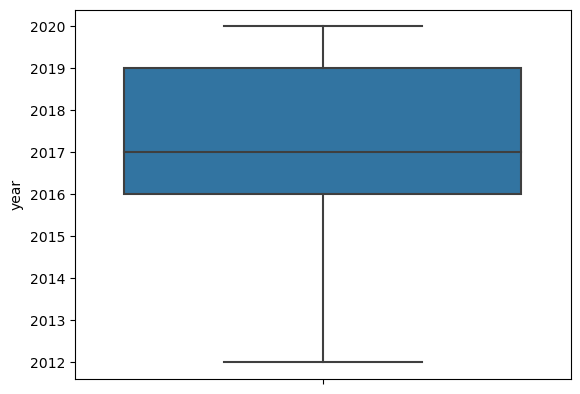

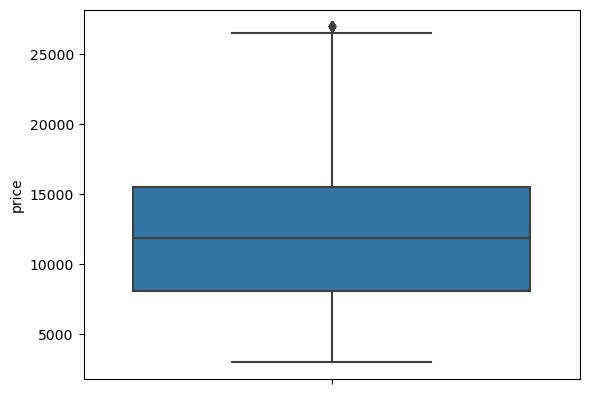

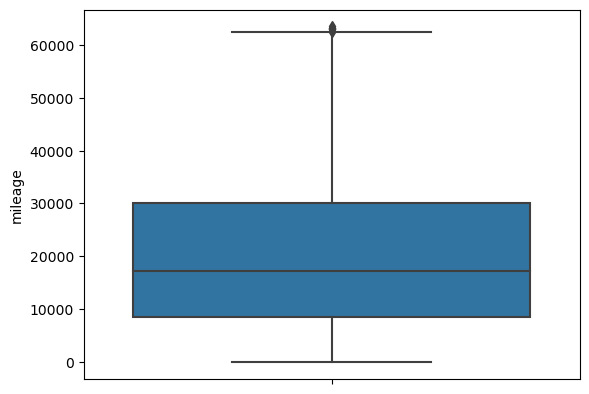

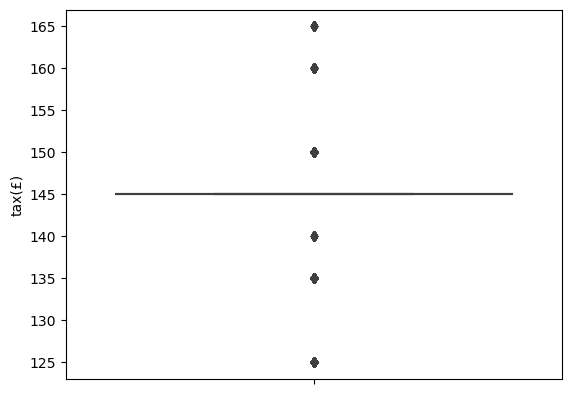

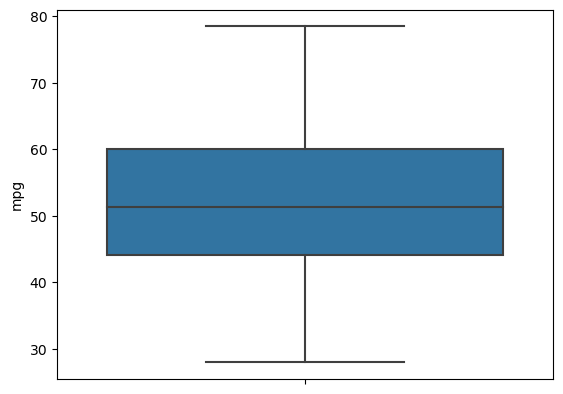

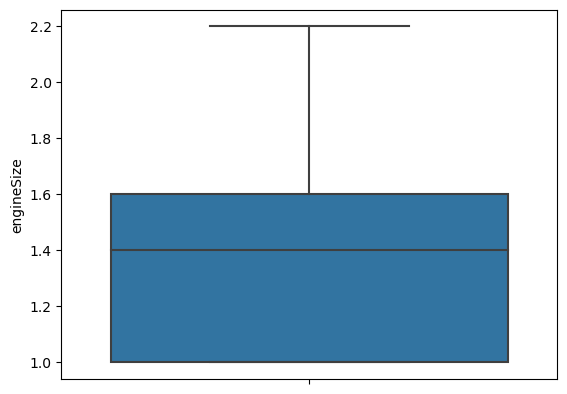

In [11]:
for i in numerical_cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr
    df = df[(df[i]>ll) & (df[i]< ul)]
    plt.figure()
    sns.boxplot(y=i,data = df)

In [12]:
df.shape

(3172, 9)

In [13]:
df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000
mean,2017.816520,13352.475095,15706.838588,144.274905,52.736066,1.396627
std,1.300997,4894.751092,12586.521489,6.956011,11.302371,0.308716
min,2012.000000,4965.000000,1.000000,125.000000,34.000000,1.000000
25%,2017.000000,8998.000000,5800.750000,145.000000,44.800000,1.000000
50%,2018.000000,13100.000000,12710.500000,145.000000,52.300000,1.400000
75%,2019.000000,16000.000000,22971.250000,145.000000,60.100000,1.600000
max,2020.000000,27000.000000,62308.000000,165.000000,78.500000,2.200000


In [14]:
# Calculate mean, median, std dev, and quartiles of numerical data
print(df[numerical_cols].describe())

              year         price       mileage       tax(£)          mpg  \
count  3172.000000   3172.000000   3172.000000  3172.000000  3172.000000   
mean   2017.816520  13352.475095  15706.838588   144.274905    52.736066   
std       1.300997   4894.751092  12586.521489     6.956011    11.302371   
min    2012.000000   4965.000000      1.000000   125.000000    34.000000   
25%    2017.000000   8998.000000   5800.750000   145.000000    44.800000   
50%    2018.000000  13100.000000  12710.500000   145.000000    52.300000   
75%    2019.000000  16000.000000  22971.250000   145.000000    60.100000   
max    2020.000000  27000.000000  62308.000000   165.000000    78.500000   

        engineSize  
count  3172.000000  
mean      1.396627  
std       0.308716  
min       1.000000  
25%       1.000000  
50%       1.400000  
75%       1.600000  
max       2.200000  


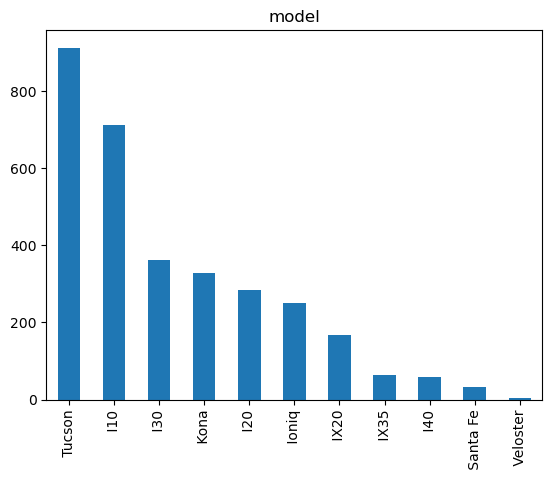

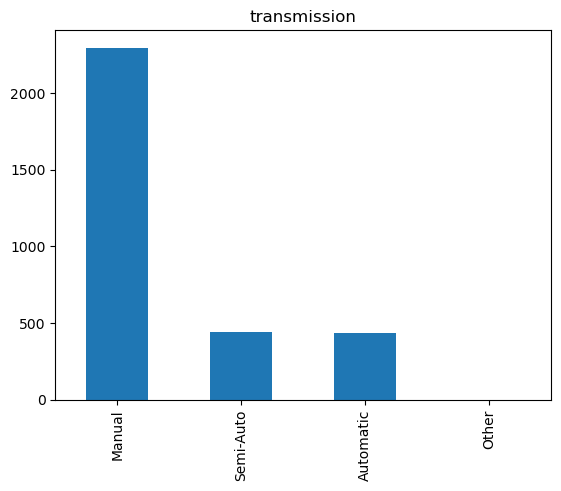

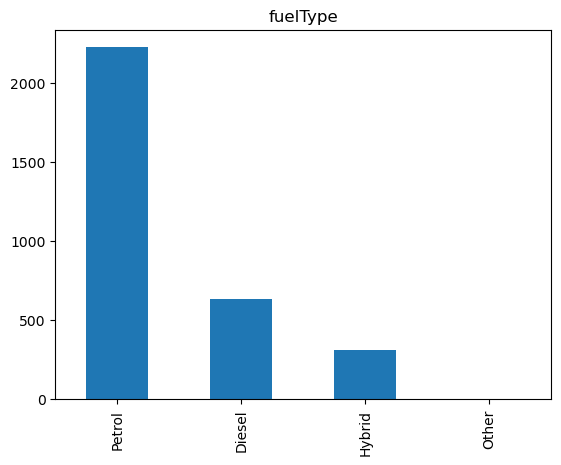

In [15]:
# Plot histograms for categorical variables
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

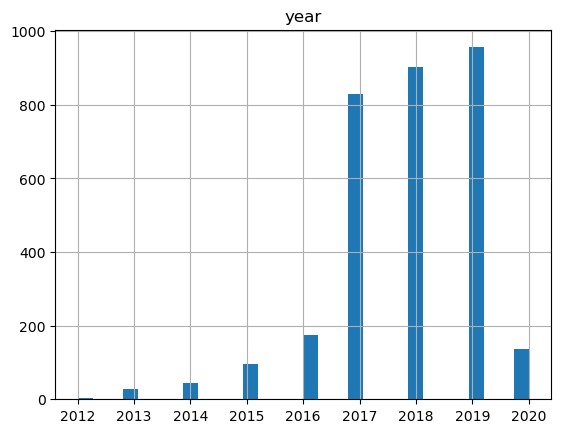

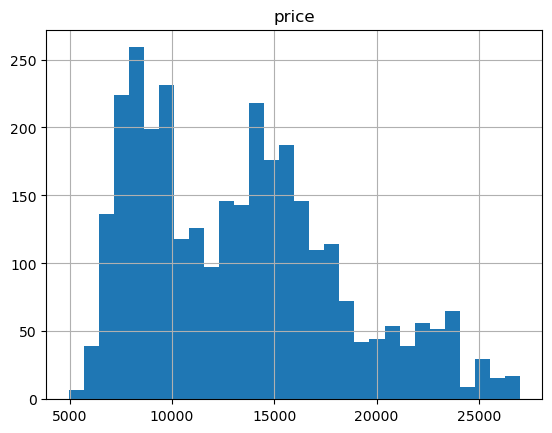

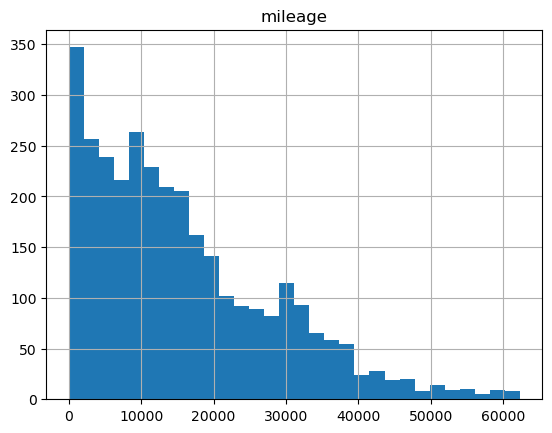

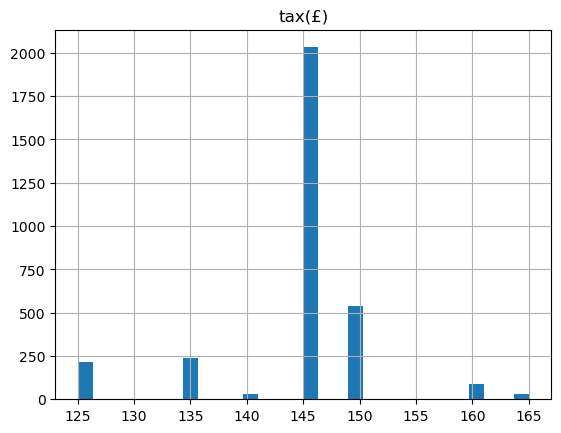

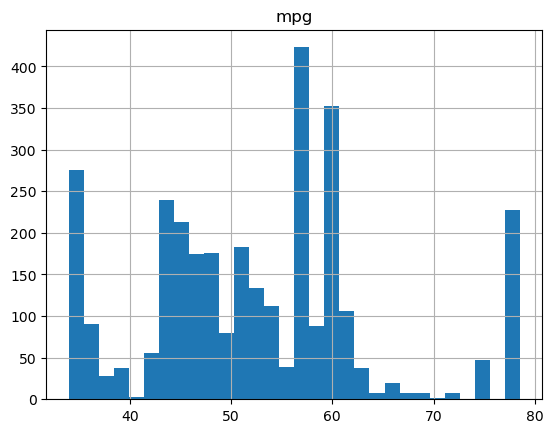

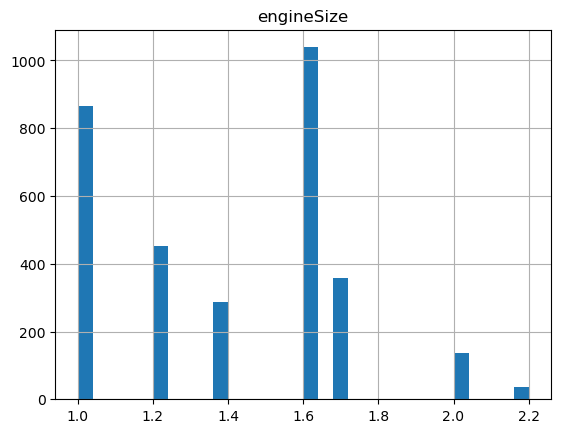

In [16]:
# Check the distribution of numerical variables
for col in numerical_cols:
    df[col].hist(bins=30)
    plt.title(col)
    plt.show()

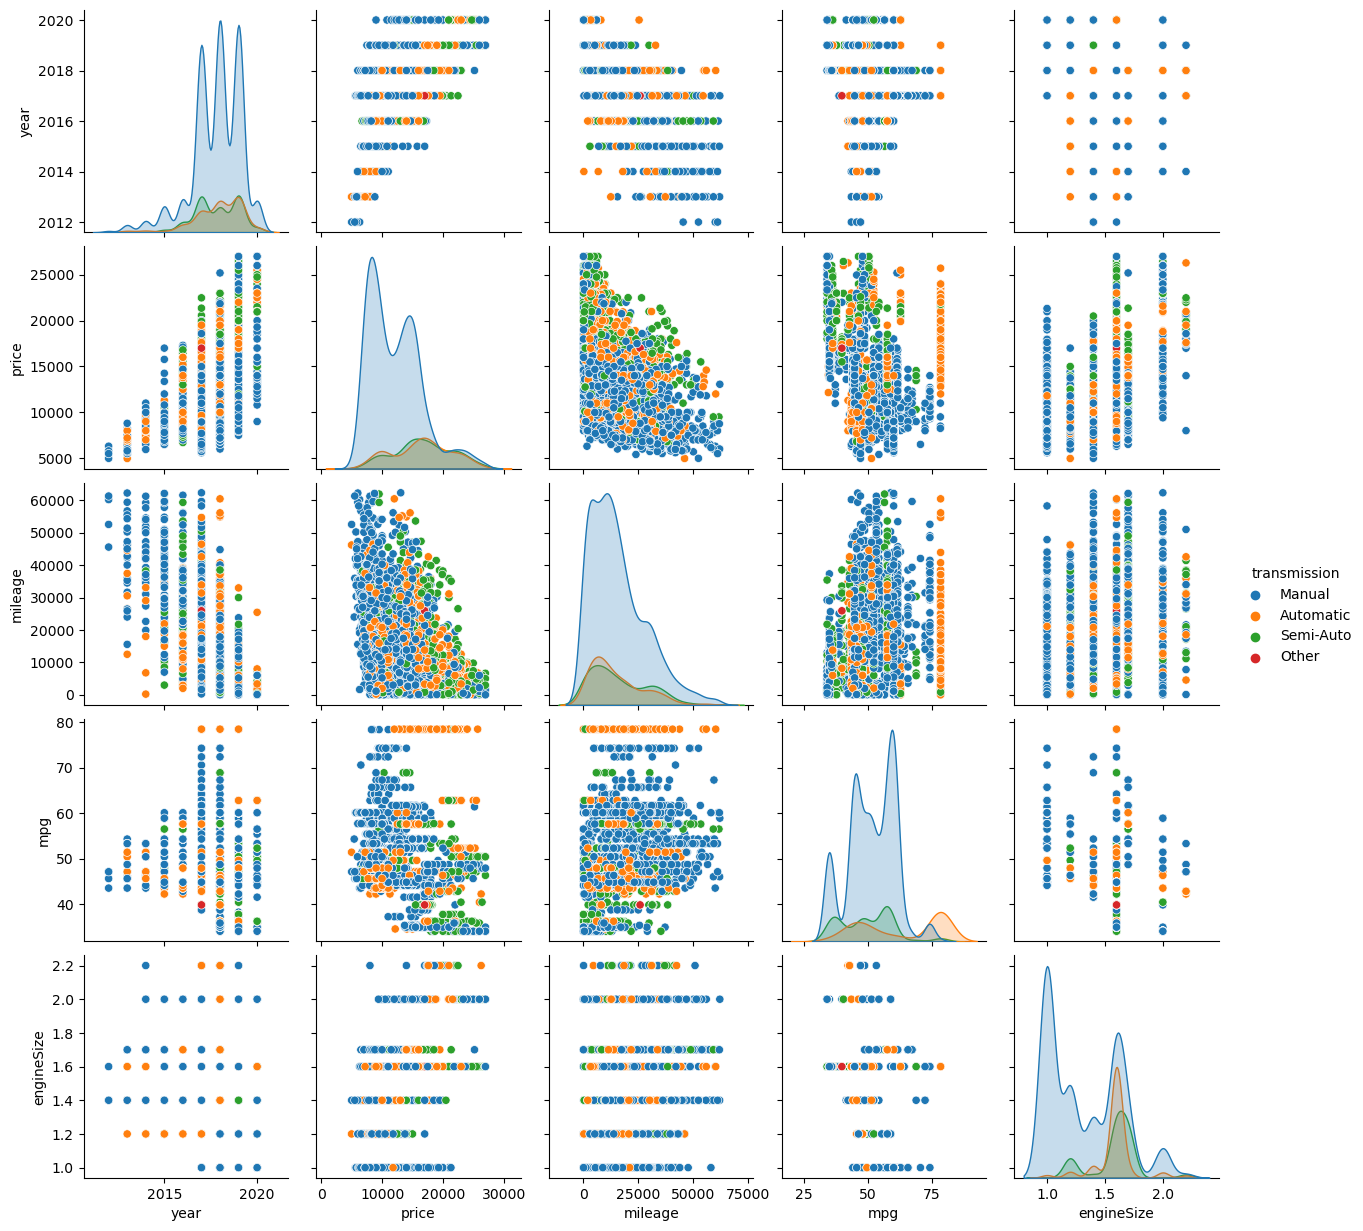

In [17]:
sns.pairplot(df, vars=['year', 'price', 'mileage', 'mpg', 'engineSize'], hue='transmission')
plt.show()

In [18]:
#Perform a Chi-square analysis to check whether there is a relationship between
#transmission and fuelType
contingency_table1 = pd.crosstab(df['transmission'], df['fuelType'])
chi2, p, dof, expected = chi2_contingency(contingency_table1)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.2f}")


Chi-square statistic: 1576.17
p-value: 0.00


In [19]:
#fuelType and model
contingency_table1 = pd.crosstab(df['model'], df['fuelType'])
chi2, p, dof, expected = chi2_contingency(contingency_table1)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.2f}")

Chi-square statistic: 3731.29
p-value: 0.00


C:\Users\User\AppData\Local\Temp\ipykernel_12800\3671083659.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),annot=True)


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

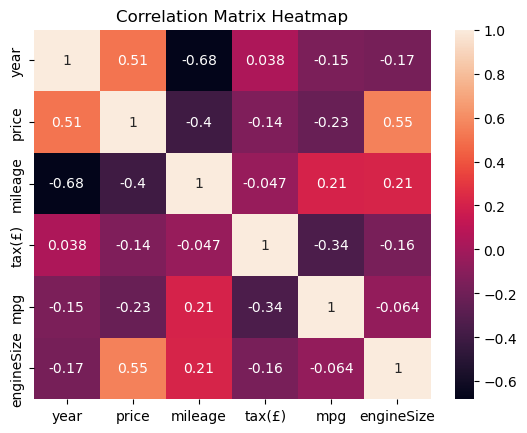

In [20]:
#Calculate Pearson correlation, and plot their heatmap
sns.heatmap(df.corr(method='pearson'),annot=True)
plt.title('Correlation Matrix Heatmap')

In [21]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
7,Tucson,2016,14199,Automatic,30300,Diesel,125,57.6,1.7
8,I30,2018,10399,Automatic,38082,Petrol,145,51.4,1.4
10,Tucson,2017,13200,Manual,22888,Diesel,150,61.7,1.7


In [22]:
#Drop any unnecessary columns
df.drop(['year','model'],axis=1, inplace= True)

In [23]:
df

,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,7999,Manual,17307,Petrol,145,58.9,1.2
4,10199,Manual,33177,Diesel,160,51.4,2.0
7,14199,Automatic,30300,Diesel,125,57.6,1.7
8,10399,Automatic,38082,Petrol,145,51.4,1.4
10,13200,Manual,22888,Diesel,150,61.7,1.7
...,...,...,...,...,...,...,...
4850,7200,Manual,17879,Petrol,145,60.1,1.0
4851,7995,Manual,8851,Petrol,145,60.1,1.0
4852,7200,Manual,14788,Petrol,150,60.1,1.0
4858,13994,Manual,23313,Petrol,145,44.8,1.6


In [24]:
#One hot encode categorical variables (if any)
df_encoded = pd.get_dummies(df, columns=['transmission', 'fuelType'])
df_encoded

,price,mileage,tax(£),mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,7999,17307,145,58.9,1.2,0,1,0,0,0,0,0,1
4,10199,33177,160,51.4,2.0,0,1,0,0,1,0,0,0
7,14199,30300,125,57.6,1.7,1,0,0,0,1,0,0,0
8,10399,38082,145,51.4,1.4,1,0,0,0,0,0,0,1
10,13200,22888,150,61.7,1.7,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,7200,17879,145,60.1,1.0,0,1,0,0,0,0,0,1
4851,7995,8851,145,60.1,1.0,0,1,0,0,0,0,0,1
4852,7200,14788,150,60.1,1.0,0,1,0,0,0,0,0,1
4858,13994,23313,145,44.8,1.6,0,1,0,0,0,0,0,1


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
#Split into train and test set
x = df_encoded.drop("price",axis = 1)
y = df_encoded['price']
x_sc = sc.fit_transform(x)
x_sc

array([[ 0.12715298,  0.10425644,  0.54545246, ..., -0.33028913,
        -0.01775832,  0.65141206],
       [ 1.38822437,  2.26100479, -0.11822972, ..., -0.33028913,
        -0.01775832, -1.53512663],
       [ 1.15961048, -2.77140804,  0.43041421, ..., -0.33028913,
        -0.01775832, -1.53512663],
       ...,
       [-0.0730133 ,  0.82317255,  0.65164161, ..., -0.33028913,
        -0.01775832,  0.65141206],
       [ 0.60440533,  0.10425644, -0.70227004, ..., -0.33028913,
        -0.01775832,  0.65141206],
       [-0.33651127, -2.77140804,  0.43041421, ..., -0.33028913,
        -0.01775832, -1.53512663]])

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
x_test

,mileage,tax(£),mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
3230,5000,145,44.1,1.0,0,1,0,0,0,0,0,1
624,24904,145,48.7,1.4,0,1,0,0,0,0,0,1
112,17350,145,48.7,1.4,0,1,0,0,0,0,0,1
700,8809,135,78.5,1.6,1,0,0,0,0,1,0,0
1833,12351,145,60.1,1.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3608,26454,145,48.7,1.7,0,1,0,0,1,0,0,0
1078,15014,135,78.5,1.6,1,0,0,0,0,1,0,0
1741,57675,145,53.3,1.7,0,1,0,0,1,0,0,0
2017,13470,125,57.6,1.7,0,0,0,1,1,0,0,0


In [29]:
from sklearn.linear_model import LogisticRegression,LinearRegression
lg = LogisticRegression()
lr = LinearRegression()

### Linear Regression Model

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(x_test)

In [32]:
y_pred

array([13496.99854553, 10964.07128195, 12087.35882048, 17902.82339518,
        8471.56900875,  8344.68347726,  8360.63804453, 16814.74684426,
       12390.21682071, 16841.54418383, 20199.91281206, 12989.26164171,
       17648.02772033, 13869.30810756, 18394.87508501, 13491.9427107 ,
       13400.83332658, 18540.76857615, 13357.28823369, 11803.2212006 ,
        8654.62274337, 20473.74598017, 11758.61196355, 12778.92129857,
       12553.53375851, 10669.05507156,  7959.18015402,  7193.63240481,
       17278.71753736, 13886.14912646, 13207.60757657, 14353.97455248,
       14775.9843062 , 17913.60774996, 14032.38660962,  8045.42422022,
       13089.93223525,  6689.2413035 , 18822.61711229,  7628.30954798,
       12224.5638795 , 13845.25634475, 13737.93741809, 18834.95929732,
       17089.35797155,  7156.64072518, 18724.45760566, 11362.57076803,
       13919.30945491, 12651.54846854, 18212.6723216 , 11347.24077914,
       11375.21568111,  6487.92771593,  9189.60269806,  8943.28353369,
      

In [33]:
from sklearn import metrics

In [34]:
metrics.mean_squared_error(y_test,y_pred)

5408523.6156136785

In [35]:
metrics.r2_score(y_test,y_pred)

0.7782699632687062

In [36]:
y_pred_train = lr.predict(x_train)

In [37]:
metrics.r2_score(y_train,y_pred_train)

0.7536722728345803

### Logistic Regression model

In [38]:
lg.fit(x_train,y_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred1 = lg.predict(x_test)

In [40]:
y_pred1

array([15498, 15498, 15498, 15498, 15498, 13995, 15498, 15498, 15498,
       15498, 15498, 15498, 15498,  8495, 15498, 15498, 15498, 15498,
       15498, 15498, 15498, 15498, 13995, 15498, 15498, 15498, 15498,
       15498, 15498, 15498,  8495, 15498, 15498, 15498, 15498,  8495,
       15498, 13995, 15498, 15498, 15498, 15498, 15498, 15498, 15498,
       13995, 15498, 15498, 15498, 13995, 13995, 15498, 13995,  8495,
       15498, 15498, 15498, 15498, 15498, 15498, 15498, 15498, 15498,
       15498,  8495, 15498, 15498, 13995, 15498, 15498, 15498, 13995,
        6999,  8495, 15498, 15498, 15498, 15498, 13995,  8495, 15498,
       15498, 15498, 15498, 15498, 13995, 15498,  8495, 13995, 13995,
       15498, 15498,  8495, 15498, 15498, 15498, 15498, 15498, 15498,
       15498, 15498, 15498, 15498, 15498, 15498, 13995,  8495,  8495,
       15498, 15498, 15498, 15498, 15498, 15498, 15498, 15498, 15498,
       15498, 13995, 15498, 15498, 15498, 15498, 13995, 15498, 15498,
       13995, 15498,

In [41]:
metrics.accuracy_score(y_test,y_pred1)

0.02100840336134454

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit (x_train, y_train)

RandomForestRegressor()

In [43]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
y_pred2 = RFR.predict(x_test)

In [45]:
y_pred2

array([14463.167     ,  9420.13      ,  9191.79      , 19458.77      ,
        7357.5       , 12112.93      ,  7234.92      , 15686.19      ,
       13646.02      , 16460.55      , 19955.14      , 12779.69      ,
       16084.50409524, 14213.54      , 23583.22186314, 16379.132     ,
       11472.79      , 21728.28      ,  9202.9       ,  8755.93      ,
       11178.6       , 20686.77      , 10937.68      , 13701.32      ,
       13127.74      , 11362.96      ,  7900.4       ,  7273.25      ,
       14604.25      , 15115.07      , 14478.88      ,  9976.56      ,
       15886.31      , 17606.66      , 12239.65      ,  9554.77      ,
       11952.82      , 10397.28      , 21454.8625    ,  7962.73      ,
       14940.47      , 14478.23      , 14775.97      , 18782.97583333,
       16938.04      ,  7020.27      , 20419.52166667, 14770.        ,
       15475.39      , 14782.41      , 18284.3       , 11886.42      ,
       15605.672     ,  9343.89      , 12072.01      ,  8377.43      ,
      

In [46]:
RFR.score(x_train,y_train)

0.9838284055612617

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit (x_train, y_train)
Yhat_DTR = DTR.predict(x_test)

k = x_test.shape[1]
n = len(x_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Decision Tree regression:', metrics.mean_absolute_error(y_test, Yhat_DTR))
print('Mean Squared Error(MSE) of Decision Tree regression:', metrics.mean_squared_error(y_test, Yhat_DTR))
print('Root Mean Squared Error (RMSE) of Decision Tree regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_DTR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Decision Tree regression: %.2f' % DTR.score(x_train, y_train))
print('Explained Variance Score (EVS) of Decision Tree regression:',explained_variance_score(y_test, Yhat_DTR))
#Residual sum of squares (rss)
print("Residual sum of squares of Decision Tree regression: %.2f" % np.mean((Yhat_DTR - y_test) ** 2))
print('R2 of Decision Tree regression:',metrics.r2_score(y_test, Yhat_DTR))
print('R2 rounded of Decision Tree regression:',(metrics.r2_score(y_test, Yhat_DTR)).round(2))
r2 = r2_score(y_test, Yhat_DTR)
r2_rounded = r2_score(y_test, Yhat_DTR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Decision Tree regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = DTR.score(x_test, y_test)
print("Accuracy of Decision Tree regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Decision Tree regression: 1237.4155578898226
Mean Squared Error(MSE) of Decision Tree regression: 3292053.011222313
Root Mean Squared Error (RMSE) of Decision Tree regression: 1814.4015573247045
Variance score of Decision Tree regression: 1.00
Explained Variance Score (EVS) of Decision Tree regression: 0.8650447579291297
Residual sum of squares of Decision Tree regression: 3292053.01
R2 of Decision Tree regression: 0.8650376540850389
R2 rounded of Decision Tree regression: 0.87
Adjusted_r2 of Decision Tree regression:  0.863
Accuracy of Decision Tree regression: 0.8650376540850389


# Support Vector Regression Model


In [48]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit (x_train, y_train)
Yhat_SVR = SVR.predict(x_test)

k = x_test.shape[1]
n = len(x_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Support Vector regression:', metrics.mean_absolute_error(y_test, Yhat_SVR))
print('Mean Squared Error(MSE) of Support Vector regression:', metrics.mean_squared_error(y_test, Yhat_SVR))
print('Root Mean Squared Error (RMSE) of Support Vector regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_SVR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Support Vector regression: %.2f' % SVR.score(x_train, y_train))
print('Explained Variance Score (EVS) of Support Vector regression:',explained_variance_score(y_test, Yhat_SVR))
#Residual sum of squares (rss)
print("Residual sum of squares of Support Vector regression: %.2f" % np.mean((Yhat_SVR - y_test) ** 2))
print('R2 of Support Vector regression:',metrics.r2_score(y_test, Yhat_SVR))
print('R2 rounded of Support Vector regression:',(metrics.r2_score(y_test, Yhat_SVR)).round(2))
r2 = r2_score(y_test, Yhat_SVR)
r2_rounded = r2_score(y_test, Yhat_SVR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Support Vector regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = SVR.score(x_test, y_test)
print("Accuracy of Support Vector regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Support Vector regression: 4047.136914462525
Mean Squared Error(MSE) of Support Vector regression: 23892137.12376826
Root Mean Squared Error (RMSE) of Support Vector regression: 4887.958379913669
Variance score of Support Vector regression: 0.02
Explained Variance Score (EVS) of Support Vector regression: 0.020508216768877707
Residual sum of squares of Support Vector regression: 23892137.12
R2 of Support Vector regression: 0.02050821655862367
R2 rounded of Support Vector regression: 0.02
Adjusted_r2 of Support Vector regression:  0.008
Accuracy of Support Vector regression: 0.02050821655862367


In [49]:
#RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
rf_preds = rf_model.predict(x_test)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
print(f"Random Forest RMSE: {rf_rmse:.3f}")


Random Forest RMSE: 1403.298


In [51]:
metrics.r2_score(y_test,rf_preds)

0.9192680460520024

In [52]:
#Compulsory
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [53]:
# Scale the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [54]:
# Define the parameter grid to search over
param_grid = {'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

In [55]:
# Create the model object
rf_model = RandomForestRegressor(random_state=42)

In [56]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

In [57]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [58]:
# Print the best hyperparameters and corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 0.904


In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
# Create polynomial features with degree 2 and 3
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly_2 = poly_features_2.fit_transform(X_train_scaled)
X_train_poly_3 = poly_features_3.fit_transform(X_train_scaled)

In [61]:
# Train linear regression with degree 2 polynomial features
lr_poly_2 = LinearRegression()
lr_poly_2.fit(X_train_poly_2, y_train)
y_pred_poly_2 = lr_poly_2.predict(poly_features_2.transform(X_test_scaled))
poly_2_rmse = mean_squared_error(y_test, y_pred_poly_2, squared=False)

In [62]:
# Train linear regression with degree 3 polynomial features
lr_poly_3 = LinearRegression()
lr_poly_3.fit(X_train_poly_3, y_train)
y_pred_poly_3 = lr_poly_3.predict(poly_features_3.transform(X_test_scaled))
poly_3_rmse = mean_squared_error(y_test, y_pred_poly_3, squared=False)

In [63]:
# Print RMSE of polynomial regression models
print(f"Polynomial Regression with Degree 2 RMSE: {poly_2_rmse:.3f}")
print(f"Polynomial Regression with Degree 3 RMSE: {poly_3_rmse:.3f}")

Polynomial Regression with Degree 2 RMSE: 147714897.530
Polynomial Regression with Degree 3 RMSE: 1751.498
